## startup Funding Exercise

**Import All DS Libraries**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import random

**Import startup_funding.xlsx file and save it as 'df'**

In [2]:
df=pd.read_excel("startup_funding.xlsx")

**View 'df' from top**

In [3]:
df.head()

,Startup Name,Industry Vertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,Dunzo,Technology,Bangalore,Google,Private Equity,12300000
1,Tata Housing,Real Estate,Mumbai,Hines,Private Equity,23000000
2,HandyTrain,Technology,Delhi NCR,NB Ventures,Private Equity,1000000
3,Mobycy,Technology,Delhi NCR,Undisclosed Investors,Seed Funding,500000
4,Greenlight Planet,Technology,Mumbai,"Apis Partner, Eight Roads Ventures, Bamboo Cap...",Private Equity,60000000


**Check 'df' information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Startup Name       1495 non-null   object
 1   Industry Vertical  1495 non-null   object
 2   City  Location     1495 non-null   object
 3   Investors Name     1490 non-null   object
 4   InvestmentnType    1495 non-null   object
 5   Amount in USD      1495 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 70.2+ KB


**Show "City Location" top names**

In [5]:
df=df.rename(columns={'City  Location':'City Location'})
df['City Location']. value_counts()

Delhi NCR    476
Bangalore    468
Mumbai       336
Chennai       66
Hyderabad     62
Pune          61
Ahmedabad     26
Name: City Location, dtype: int64

**Show "City Location" Unique names**

In [6]:
df["City Location"].unique()

array(['Bangalore', 'Mumbai', 'Delhi NCR', 'Chennai', 'Hyderabad', 'Pune',
       'Ahmedabad'], dtype=object)

**Show total "City Location" unique names**

In [7]:
len(df['City Location'].unique())

7

**Show total "Industry Vertical" unique names**

In [8]:
len(df["Industry Vertical"].unique())

488

**Create duummies for "InvestmentnType" and save it as 'investment'**

In [9]:
investment= pd.get_dummies(prefix=None,data=df['InvestmentnType'],columns=['InvestmentnType'],drop_first=True)

In [10]:
investment.head()

,Private Equity,Seed Funding
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


**Create duummies for "City  Location" and save it as 'city'**

In [11]:
city= pd.get_dummies(prefix=None,data=df['City Location'],columns=['City Location'],drop_first=True)

In [12]:
city.head()

,Bangalore,Chennai,Delhi NCR,Hyderabad,Mumbai,Pune
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0


**Drop columns ["Startup Name", "Industry Vertical","Investors Name", "InvestmentnType", "City  Location"] from "df"**

In [13]:
df.drop(columns=["Startup Name", "Industry Vertical","Investors Name", "InvestmentnType", "City Location"],inplace=True)

**Check if columns have been removed "df"**

In [14]:
df.head()

,Amount in USD
0,12300000
1,23000000
2,1000000
3,500000
4,60000000


**Concatenate "df" to 'investment' and 'city'**

In [15]:
df=pd.concat([investment,city,df],axis='columns')

**Check if columns concat have been done with "df"**

In [16]:
df.head()

,Private Equity,Seed Funding,Bangalore,Chennai,Delhi NCR,Hyderabad,Mumbai,Pune,Amount in USD
0,1,0,1,0,0,0,0,0,12300000
1,1,0,0,0,0,0,1,0,23000000
2,1,0,0,0,1,0,0,0,1000000
3,0,1,0,0,1,0,0,0,500000
4,1,0,0,0,0,0,1,0,60000000


**As all are in Quant form, we will approach with Linear Regression.**

**Import LinearRegression, train_test_split, metrics from sklearn**

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

**Take 'x' by dropping ""Amount in USD"" from df
and take 'y' as "Amount in USD"**

In [18]:
X=df.drop(columns=['Amount in USD'])
y=df[['Amount in USD']]

**Perform train_test_split**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=1234)

In [20]:
X

,Private Equity,Seed Funding,Bangalore,Chennai,Delhi NCR,Hyderabad,Mumbai,Pune
0,1,0,1,0,0,0,0,0
1,1,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0
3,0,1,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
1490,0,1,0,0,1,0,0,0
1491,1,0,1,0,0,0,0,0
1492,0,1,1,0,0,0,0,0
1493,0,1,0,1,0,0,0,0


In [21]:
y

,Amount in USD
0,12300000
1,23000000
2,1000000
3,500000
4,60000000
...,...
1490,1000000
1491,3500000
1492,400000
1493,500000


**Perform model calling, fitting, predictions (save prediction result as "predict")**

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)

predict = lm.predict(X_test)

**Draw scatter plot between ytest and predict**

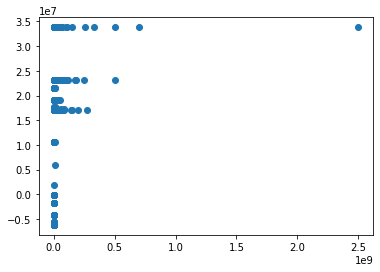

In [23]:
plt.scatter(y_test, predict)

In [24]:
lm.fit(X_train,y_train)

LinearRegression()

In [25]:
predict_test = lm.predict(X_test)

print("accuracy score", r2_score(y_test,predict_test))

print("intercept",lm.intercept_)

print("coeeficient",lm.coef_)

accuracy score 0.017585639046479917
intercept [353647.53706658]
coeeficient [[17251276.08116638 -6019036.64515392 16212940.99690462  1520141.19248231
   5506424.66476916  3919409.85957238  -520100.51376721  -281435.96645975]]


**Find R2.**

In [26]:
print( metrics.r2_score(y_test, predict))

0.017585639046479917


**Find mse.**

In [27]:
print( metrics.mean_squared_error(y_test, predict))

1.016405313981051e+16
